In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
df=pd.read_csv("data.csv")

In [5]:
df.head()

,Investor Type,Age,Equity,Mutual Funds,Debt Funds,Sovereign Gold Bonds,Government Bonds,Public Provident Fund,Fixed Deposits
0,Aggressive Investor,20,80,15,0,0,0,0,5
1,Moderate Investor,20,50,25,10,5,0,5,5
2,Conservative Investor,20,20,20,20,10,10,10,10
3,Aggressive Investor,30,75,20,0,0,0,0,5
4,Moderate Investor,30,45,30,10,5,0,5,5


In [6]:
df['Investor Type'].unique()

array(['Aggressive Investor ', 'Moderate Investor ',
       'Conservative Investor '], dtype=object)

In [7]:
df['Investor Type']=df['Investor Type'].replace({'Aggressive Investor ':3, 'Moderate Investor ':2,'Conservative Investor ':1})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Investor Type          12 non-null     int64
 1   Age                    12 non-null     int64
 2    Equity                12 non-null     int64
 3   Mutual Funds           12 non-null     int64
 4   Debt Funds             12 non-null     int64
 5   Sovereign Gold Bonds   12 non-null     int64
 6   Government Bonds       12 non-null     int64
 7   Public Provident Fund  12 non-null     int64
 8   Fixed Deposits         12 non-null     int64
dtypes: int64(9)
memory usage: 992.0 bytes


In [9]:
df.describe()

,Investor Type,Age,Equity,Mutual Funds,Debt Funds,Sovereign Gold Bonds,Government Bonds,Public Provident Fund,Fixed Deposits
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,2.000000,35.000000,42.500000,27.500000,12.500000,5.000000,2.916667,2.916667,6.666667
std,0.852803,11.677484,26.241882,7.229988,12.339884,4.264014,4.501683,3.342790,2.461830
min,1.000000,20.000000,5.000000,15.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,1.000000,27.500000,18.750000,23.750000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,2.000000,35.000000,42.500000,27.500000,10.000000,5.000000,0.000000,2.500000,5.000000
75%,3.000000,42.500000,66.250000,31.250000,21.250000,10.000000,6.250000,5.000000,10.000000
max,3.000000,50.000000,80.000000,40.000000,35.000000,10.000000,10.000000,10.000000,10.000000


In [10]:
df.corr()

,Investor Type,Age,Equity,Mutual Funds,Debt Funds,Sovereign Gold Bonds,Government Bonds,Public Provident Fund,Fixed Deposits
Investor Type,1.000000,0.000000e+00,0.974933,-2.948839e-01,-0.950255,-1.000000e+00,-0.828804,-0.478345,-8.660254e-01
Age,0.000000,1.000000e+00,-0.222497,8.075729e-01,0.157720,2.594535e-17,-0.129701,-0.407556,8.987734e-17
Equity,0.974933,-2.224971e-01,1.000000,-4.671748e-01,-0.961528,-9.749334e-01,-0.779170,-0.375674,-8.443171e-01
Mutual Funds,-0.294884,8.075729e-01,-0.467175,1.000000e+00,0.331163,2.948839e-01,-0.104743,0.047019,9.072812e-17
Debt Funds,-0.950255,1.577201e-01,-0.961528,3.311632e-01,1.000000,9.502553e-01,0.797804,0.192839,8.977584e-01
Sovereign Gold Bonds,-1.000000,2.594535e-17,-0.974933,2.948839e-01,0.950255,1.000000e+00,0.828804,0.478345,8.660254e-01
Government Bonds,-0.828804,-1.297013e-01,-0.779170,-1.047433e-01,0.797804,8.288039e-01,1.000000,0.289474,9.570203e-01
Public Provident Fund,-0.478345,-4.075558e-01,-0.375674,4.701871e-02,0.192839,4.783446e-01,0.289474,1.000000,1.841149e-01
Fixed Deposits,-0.866025,8.987734e-17,-0.844317,9.072812e-17,0.897758,8.660254e-01,0.957020,0.184115,1.000000e+00


<Axes: >

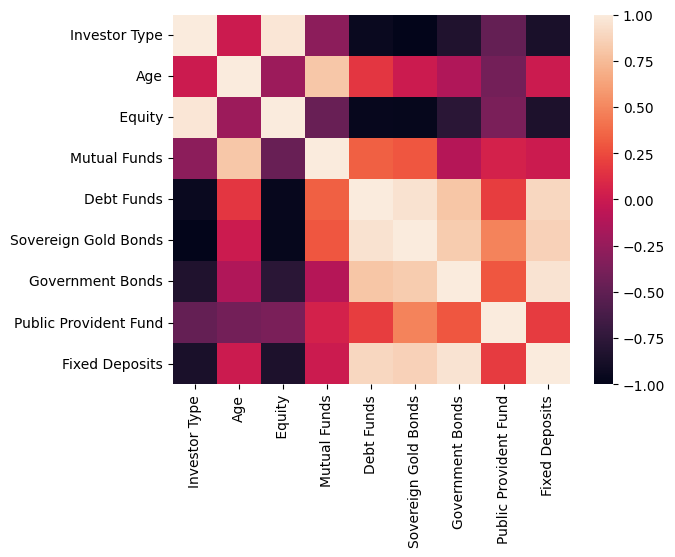

In [11]:
sns.heatmap(df.corr())

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
x=df[['Age','Investor Type']]
y=df.drop(['Age','Investor Type'],axis=1)

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the model with the specified hyperparameters
model = RandomForestRegressor(
    n_estimators=100,     # Number of trees in the forest
    max_depth=None,       # Maximum depth of the tree
    min_samples_split=2,  # Minimum number of samples required to split a node
    min_samples_leaf=1,   # Minimum number of samples required at each leaf node
    bootstrap=False       # Method of selecting samples for training each tree
)

# Fit the model on the training data
model.fit(x, y)

# Evaluate the model
y_pred = model.predict(x)
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.0


In [15]:
import pickle

# Save the model to disk
filename = 'portfolio.pkl'
with open(filename, 'wb') as file:
    model=pickle.dump(model, file)

print(f"Model saved to {filename}")


Model saved to portfolio.pkl


In [ ]:
import numpy as np 
predict_value=model.predict(pd.DataFrame({"Age":[12],'Investor Type':[3]}))[0]
df_result=predict_value/predict_value.sum()*100
df_round=np.round(df_result)
print(df_round)

[10. 60. 20.  0.  0.  0.  0. 10.]


In [16]:
filename = 'portfolio.pkl'
with open(filename, 'rb') as file:
    model=pickle.load( file)

In [17]:
model.predict(pd.DataFrame({"Age":[12],'Investor Type':[3]}))

array([[80., 15.,  0.,  0.,  0.,  0.,  5.]])

In [19]:
filename = 'portfolio.pkl'
with open(filename, 'rb') as file:
    model=pickle.load( file)

def portfolio_allocation(Age,Investor_Type):
    Investor_Type=Investor_Type.replace("Aggressive Investor ","3")
    Investor_Type=Investor_Type.replace("Moderate Investor ","2")
    Investor_Type=Investor_Type.replace("Conservative Investor ","1")
    df=pd.DataFrame({"Age":[Age],'Investor Type':[Investor_Type]})

    predict_value=model.predict(df)[0]
    df_result=predict_value/predict_value.sum()*100
    df_round=np.round(df_result)
    print(df_round) 

portfolio_allocation(20,"Moderate Investor ")
    

[50. 25. 10.  5.  0.  5.  5.]
